# Notes on the Alcubierre Metric

Jacky Song

The Alcubierre Metric is an elusive subset of Einstein's General Relativity, sought after because it allows for the possibility of faster-than-light travel. The metric is written in condensed form as follows:

$$
ds^2 = -(a^2-\beta_i\beta^i) dt^2 + 2\beta_idx^idt + _{\gamma ij}dx^idx^j
$$

The metric relates the distance between two points within spacetime $ds^2$ (equivalently expressed as $\Delta s^2$) with the geometry of spacetime, given in spacetime coordinates $\alpha, \beta, \gamma, \Delta (d)$ and spatial coordinates $i, j,$ and so forth.

The metric's characteristics are as follows:

* It allows for the creation of a local space-like light cone (a "bubble)
* It allows for the positive acceleration of such a space-like light cone via the compression and expansion of spacetime, while keeping all occupants of the spacetime bubble static
* Perhaps most remarkably, it allows travel between two points apparently unimpeded by the faster-than-light prohibition of classical mechanics

A one-to-one mapping of the Alcubierre Metric to python code can be expressed as such:

```python
# The Alcubierre metric
import time
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

np.seterr(divide='ignore', invalid='ignore')
mpl.rcParams['toolbar'] = 'None'

x, y, z, X, xs, p, P, Z = symbols("x, y, z, X, xs, p, P, Z")

def rho(y, z):
	return np.sqrt(y**2 + z**2)


def d_rs(x, rho, xs=2.5):
	return ((x - xs)**2 + rho**2)**(1/2)


def d_frs(rs, sigma=8, R=1):
	a = sigma * (np.tanh((R + rs)*sigma)**2 - 1)
	b = sigma * ((np.tanh(-(R - rs)*sigma)**2 - 1) / np.tanh(R * sigma))
	return (-1/2) * (a - b)


def theta(x, p, xs=2.5, s=8, R=1):
	vs = R
	drs = d_rs(x, p, xs)
	dfrs = d_frs(drs, s, R)

	return vs * ((x - xs) / drs) * dfrs

X, P = np.meshgrid(x, p)
# The final form of the metric
Z = theta(X, P, xs, 8, 1)
# print(Z)
```

One may also perform calculations using this form of the metric, as shown below:

In [43]:
# the Alcubierre metric

import time
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sympy import tanh, cosh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, RicciScalar

sympy.init_printing()

In [45]:
import time
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

np.seterr(divide='ignore', invalid='ignore')
mpl.rcParams['toolbar'] = 'None'

x, y, z, X, xs, p, P, Z = symbols("x, y, z, X, xs, p, P, Z")

def rho(y, z):
	return np.sqrt(y**2 + z**2)


def d_rs(x, rho, xs=2.5):
	return ((x - xs)**2 + rho**2)**(1/2)


def d_frs(rs, sigma=8, R=1):
	a = sigma * (np.tanh((R + rs)*sigma)**2 - 1)
	b = sigma * ((np.tanh(-(R - rs)*sigma)**2 - 1) / np.tanh(R * sigma))
	return (-1/2) * (a - b)


def theta(x, p, xs=2.5, s=8, R=1):
	vs = R
	drs = d_rs(x, p, xs)
	dfrs = d_frs(drs, s, R)

	return vs * ((x - xs) / drs) * dfrs

X, P = np.meshgrid(x, p)
# The final form of the metric
Z = theta(X, P, xs, 8, 1)
# print(Z)
# Code is buggy, needs to be fixed

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable tanh method

The peculiar characteristics of the Alcubierre Metric, and in particular that of its "spacetime bubble" can be understood via the geometry of the arbitrary space-like geodesics (abstracted via the ADM formalism of General Relativity. It may suffice to provide a detailed explanation of the ADM formalism, for the sake of better explaining the nature of the metric.

## Fundamental Principles of ADM Theory

We may begin a basic overview of ADM via deriving its core components from the the canocial form of the Lorentzian metric of Special Relativity, the most fundamental of the spacetime metrics.

...

Below is a visualization of the Alcubierre Metric, shown as a plot of York time, a means of showing the curvature of spacetime:

In [11]:
# core.display has been depreciated, so instead
from IPython.display.IFrame import display, HTML
import json
import numpy as np

def plot3D(X, Y, Z, height=600, xlabel = "X", ylabel = "Y", zlabel = "Z", initialCamera = None):

    options = {
        "width": "100%",
        "style": "surface",
        "showPerspective": True,
        "showGrid": True,
        "showShadow": False,
        "keepAspectRatio": True,
        "height": str(height) + "px"
    }

    if initialCamera:
        options["cameraPosition"] = initialCamera
        
    data = [ {"x": X[y,x], "y": Y[y,x], "z": Z[y,x]} for y in range(X.shape[0]) for x in range(X.shape[1]) ]
    visCode = r"""
       <link href="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.css" type="text/css" rel="stylesheet" />
       <script src="https://cdnjs.cloudflare.com/ajax/libs/vis/4.21.0/vis.min.js"></script>
       <div id="pos" style="top:0px;left:0px;position:absolute;"></div>
       <div id="visualization"></div>
       <script type="text/javascript">
        var data = new vis.DataSet();
        data.add(""" + json.dumps(data) + """);
        var options = """ + json.dumps(options) + """;
        var container = document.getElementById("visualization");
        var graph3d = new vis.Graph3d(container, data, options);
        graph3d.on("cameraPositionChange", function(evt)
        {
            elem = document.getElementById("pos");
            elem.innerHTML = "H: " + evt.horizontal + "<br>V: " + evt.vertical + "<br>D: " + evt.distance;
        });
       </script>
    """
    htmlCode = "<iframe srcdoc='"+visCode+"' width='100%' height='" + str(height) + "px' style='border:0;' scrolling='no'> </iframe>"
    display(HTML(htmlCode))

In [21]:
X, Y = np.meshgrid(np.linspace(-3,3,50),np.linspace(-3,3,50))
Z = np.sin(X**2 + Y**2)**2/(X**2+Y**2)
plot3D(X, Y, Z)

/home/songtech/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


\*: Additionally, the results can also be displayed via a Three.js bridge from <https://github.com/jupyter-widgets/pythreejs>

A more tangible visualization of the curvature, as a stereoscopic projection of the warp-buble in spacetime rendered by a raytracing render engine, is shown below:

In [53]:
# Find a better framework for this and try to embed it
# Also fork the repo and implement physically-based raytracing and accurate textures support soon 
from IPython.core.display import display, HTML
htmlCode = "<iframe src='vis/raytrace/index.html' width='100%' height='100%' style='border:0;' scrolling='no'> </iframe>"
display(HTML(htmlCode))

From this visualization alone\*, we may ascertain the presence of the shaping function (the so-called "top hat") in producing the neccesary expansion and contraction of spacetime itself, so as to form a local light cone. However, this visualization ignores the *other* two key components of the metric: the "pusher" function (which allows for the static warp bubble itself to be push along a certain axis), and the energy density function.

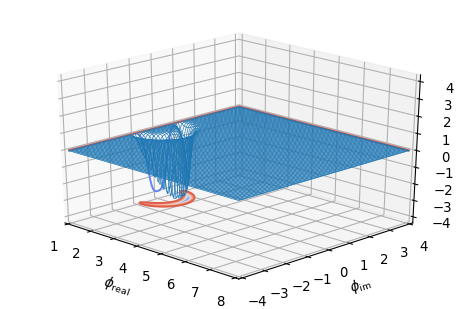

In [41]:
import time
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

np.seterr(divide='ignore', invalid='ignore')
mpl.rcParams['toolbar'] = 'None'


def rho(y, z):
	return np.sqrt(y**2 + z**2)


def d_rs(x, rho, xs=2.5):
	return ((x - xs)**2 + rho**2)**(1/2)


def d_frs(rs, sigma=8, R=1):
	a = sigma * (np.tanh((R + rs)*sigma)**2 - 1)
	b = sigma * ((np.tanh(-(R - rs)*sigma)**2 - 1) / np.tanh(R * sigma))
	return (-1/2) * (a - b)


def theta(x, p, xs=2.5, s=8, R=1):
	vs = R
	drs = d_rs(x, p, xs)
	dfrs = d_frs(drs, s, R)

	return vs * ((x - xs) / drs) * dfrs


# Create the Figure.
fig = plt.figure(dpi=96)
fig.canvas.set_window_title('Alcubierre Warp Drive')
ax = fig.gca(projection='3d')
ax.view_init(25, -45)

# Add latex math labels.
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

# Inputs vectors.
x = np.linspace(1.0, 8.0, num=160)
p = np.linspace(-4.0, 4.0, num=160)

# Generate coordinate matrices from coordinate vectors.
X, P = np.meshgrid(x, p)

# Set the axis limits so they aren't recalculated each frame.
ax.set_xlim(1.0, 8.0)
ax.set_ylim(-4, 4)
ax.set_zlim(-4.2, 4.2)

# Begin plotting.
frame = None
csets = []
for xs in np.linspace(1.0, 10.0, 200):

	if frame:
		ax.collections.remove(frame)

	if csets:
		for sets in csets:
			if sets.collections:
				for cols in sets.collections:
					ax.collections.remove(cols)
				csets.remove(sets)

	# Calculate the metric tensor.
	Z = theta(X, P, xs, 8, 1)

	# Plot the Surface.
	frame = ax.plot_wireframe(
		X, P, Z, rstride=2, cstride=2, linewidth=0.5, antialiased=True)

	# Plot projections of the contours for each dimension.
	csets.append(ax.contour(X, P, Z, zdir='x', offset=1, cmap=plt.cm.coolwarm))
	csets.append(ax.contour(X, P, Z, zdir='y', offset=4, cmap=plt.cm.coolwarm))
	csets.append(ax.contour(X, P, Z, zdir='z', offset=-4.2, cmap=plt.cm.coolwarm))

	# Wait
	plt.pause(0.001)


We can then derive the energy densities of the Alcubierre Metric, via the Einstein Field Equations, provided in Alcubierre's canonical form:
$$
T^{\mu\nu} = -\frac{c^4}{8\pi G}\frac{v_s^2(y^2+z^2)}{4g^2r_s^2}\Big(\frac{df}{dr_s}\Big)^2
$$

Translating the energy density equation with the `latex2sympy` library results in the following function:

In [20]:
from latex2sympy import *
latex2sympy("-\frac{c^4}{8\pi G}\frac{v_s^2(y^2+z^2)}{4g^2r_s^2}\Big(\frac{df}{dr_s}\Big)^2", conf=ConfigL2S())

                      2        2  2     2                4       ⎛ 2    2⎞
-(\Big⋅rₛ⋅d⋅f⋅d⋅c⋅a⋅r) ⋅\Big⋅rₛ ⋅g ⋅4⋅vₛ ⋅c⋅a⋅r⋅G⋅\pi⋅8⋅c ⋅c⋅a⋅r⋅⎝y  + z ⎠

Therefore, an investigation into alternative *Alcubierre-like* metrics for superluminal travel will also be required to meet the above characteristics. Specifically, the 

## References

This is an incomplete and by no means comprehensive bibliography. While I have attempted to trace all of my research and give proper credit to the original researchers, there are likely errors in some, if not all, of these citations.

* Author A. Year. Title of program. San Francisco (CA): GitHub; [accessed Year Mon Day]. URL.